# Import all Libraries

In [1]:
import numpy as np
import os
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


Using TensorFlow backend.


# Request to get the IMDB data

In [2]:
!wget --no-check-certificate http://mng.bz/0tIo



--2020-01-24 13:14:27--  http://mng.bz/0tIo
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/0tIo [following]
--2020-01-24 13:14:27--  https://mng.bz/0tIo
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: http://s3.amazonaws.com/text-datasets/aclImdb.zip [following]
--2020-01-24 13:14:27--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.42.94
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.42.94|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘0tIo’

0tIo                100%[===================>]  57.90M  35.5MB/s    in 1.6s    

2020-01-24 13:14:29 (35.5 MB/s) - ‘0tIo’ saved [60711700/60711700]



In [0]:
!unzip -q 0tIo

# Read the IMDB Data and append labels 

In [0]:
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    #print(fname)
    if fname[-4:] == '.txt':
      #print('opening file', fname)
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [5]:
print(len(texts))

25000


In [6]:
# Define the maximum length of each record 
maxlen = 100                  
# Define the number of samples to be taken for training
training_samples = 8000 
# Define number of validation samples. In this we will see that even less number of training samples than validation data also perform not very bad      
validation_samples = 10000
# Creates a tokenizer, configured to only take into account the 10,000 most common words
max_words = 10000             

# Create Tokenizer , Fit it to the Texts and create a sequence of texts from the tokenizer 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
# Create a dictionary of the word and respective numeric index value 
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# Define the sequence with the numeric indexes 
data = pad_sequences(sequences, maxlen=maxlen)
# variable for labels
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Shuffle the indices as the data are normally in group for each label 
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
# Segreegate data for training and validation 
x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


# Downloading the Glove model  

In [7]:

!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-01-24 13:14:46--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-01-24 13:14:46--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-01-24 13:14:46--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [8]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


We will use the glove model for 100 dimension . We can use heavier models but due to memory constraints we are using this one 

# Read the embedding file and load the data

In [9]:
glove_dir = '/content'
embeddings_index = {}

embedding_dim = 100
embedding_file_name = 'glove.6B.100d.txt'

f = open(os.path.join(glove_dir, embedding_file_name ))
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [10]:
print(list(embeddings_index.keys())[0:100])


['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s", 'for', '-', 'that', 'on', 'is', 'was', 'said', 'with', 'he', 'as', 'it', 'by', 'at', '(', ')', 'from', 'his', "''", '``', 'an', 'be', 'has', 'are', 'have', 'but', 'were', 'not', 'this', 'who', 'they', 'had', 'i', 'which', 'will', 'their', ':', 'or', 'its', 'one', 'after', 'new', 'been', 'also', 'we', 'would', 'two', 'more', "'", 'first', 'about', 'up', 'when', 'year', 'there', 'all', '--', 'out', 'she', 'other', 'people', "n't", 'her', 'percent', 'than', 'over', 'into', 'last', 'some', 'government', 'time', '$', 'you', 'years', 'if', 'no', 'world', 'can', 'three', 'do', ';', 'president', 'only', 'state', 'million', 'could', 'us', 'most', '_', 'against', 'u.s.']


# Steps
1. Defining blank Embedding_matrix
2. Updating Embedding matrix by reading sequentially using the Embedding Index 

In [0]:
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector   # Words not found in the embedding index will be all zeros

In [22]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


1. Set the weights to the Embedding matrix 
2. Freeze the Embedding layer as we are using a pretrained model


In [0]:

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

# Compile and train the model

In [24]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val, y_val)
                    )

model.save_weights('pre_trained_glove_model.h5')

Train on 8000 samples, validate on 10000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 187us/step - loss: 0.6782 - acc: 0.6066 - val_loss: 0.6621 - val_acc: 0.5965
Epoch 2/100
8000/8000 [==============================] - 1s 156us/step - loss: 0.5560 - acc: 0.7191 - val_loss: 0.6299 - val_acc: 0.6649
Epoch 3/100
8000/8000 [==============================] - 1s 157us/step - loss: 0.4720 - acc: 0.7750 - val_loss: 0.5783 - val_acc: 0.7067
Epoch 4/100
8000/8000 [==============================] - 1s 153us/step - loss: 0.4060 - acc: 0.8226 - val_loss: 0.6038 - val_acc: 0.7008
Epoch 5/100
8000/8000 [==============================] - 1s 159us/step - loss: 0.3507 - acc: 0.8496 - val_loss: 0.7121 - val_acc: 0.6860
Epoch 6/100
8000/8000 [==============================] - 1s 152us/step - loss: 0.2955 - acc: 0.8735 - val_loss: 0.6842 - val_acc: 0.7036
Epoch 7/100
8000/8000 [==============================] - 1s 166us/step - loss: 0.2442 - acc: 0.9030 - val_loss: 0.7280 - val_acc:

# Plot the Output to see the performance

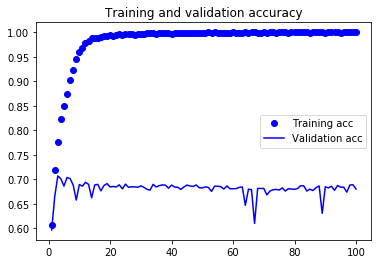

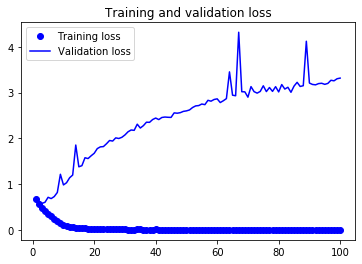

In [25]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()